## Final Project Submission

Please fill out:
* Student name: Christos, Marcos and Rachel
* Student pace: Full Time
* Scheduled project review date/time: 02/19/2021 - 5p.m. CT
* Instructor name: Max Barry
* Blog post URL: www.google.com


# **Goal**: To create a model to get a criterion as high of accuracy as possible using Multiple Regression

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
from sklearn import ensemble

In [135]:
df = pd.read_csv("data/kc_house_data.csv")

In [136]:
df.shape

(21597, 21)

In [137]:
df.sort_values('date')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12076,5437600140,1/10/2015,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,8,2240,0.0,2002,0.0,98042,47.3922,-122.165,1920,5288
19359,2215450100,1/12/2015,330000.0,4,2.50,2240,7589,2.0,0.0,0.0,...,8,2240,0.0,1994,NaN,98030,47.3824,-122.207,2250,7300
2548,4322300340,1/12/2015,265000.0,4,1.50,1740,12728,1.0,0.0,0.0,...,7,1180,560.0,1964,0.0,98003,47.2808,-122.300,1830,11125
18398,2523039310,1/12/2015,359000.0,4,2.50,1820,11325,1.0,NaN,0.0,...,8,1390,430.0,1976,0.0,98166,47.4574,-122.361,1990,10802
11086,3816300105,1/12/2015,435000.0,4,2.50,2060,10125,2.0,0.0,0.0,...,7,1560,500.0,1979,0.0,98028,47.7640,-122.262,1760,9876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19256,2391600735,9/9/2014,550000.0,3,1.50,1730,5750,1.0,0.0,0.0,...,7,1250,480.0,1947,NaN,98116,47.5645,-122.397,1370,5750
66,3394100030,9/9/2014,975000.0,4,2.50,2720,11049,2.0,NaN,0.0,...,10,2720,0.0,1989,0.0,98004,47.5815,-122.192,2750,11049
20288,8080400177,9/9/2014,520000.0,2,1.75,1340,1368,2.0,0.0,0.0,...,7,1060,280.0,2006,0.0,98122,47.6180,-122.311,2480,1707
12438,1328330510,9/9/2014,344950.0,3,1.75,1870,7500,1.0,0.0,0.0,...,8,1320,550.0,1978,0.0,98058,47.4428,-122.134,1870,7275


In [138]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [139]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [140]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [141]:
df['sqft_basement'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [142]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [143]:
df['condition'] = np.where(df['condition']=='?', 0, df['condition'])

In [144]:
df['condition'] = df['condition'].astype(float)

In [145]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(df, 15))

KeyError: ('condition', 'date')

### We can see that we have some outliers

# Which strategy to adopt with the NaN Values?

In [146]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [147]:
df['waterfront'].value_counts()

# Maybe replace nan values with 0, since it's very unlikely that such important thing would not be mentioned

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [ ]:
df['yr_renovated'].value_counts()

# Define a value to be clear that we don't have this value, removing NaN values OR removing rows with NaN values.

In [ ]:
df['view'].value_counts()

### Based on our dataframe all the values are fitable of replacing the NaN value for a 0

In [153]:
df = df.fillna(0)

In [154]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### We drop the columns that don't give us any value to the predicting ***

### Let's take a look at the new table

In [15]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3.0,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [16]:
df['has_basement1'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [17]:
df['has_basement1'] = df['has_basement1'].astype(float)

In [18]:
df['has_basement'] = np.where(df['has_basement1']>0, 1, 0)

In [19]:
df = df.drop(columns=['sqft_basement', 'has_basement1'])

In [20]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3.0,7,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3.0,6,1933,NaN,98028,47.7379,-122.233,2720,8062,0


In [21]:
df['has_basement'] = df['has_basement'].astype(str)

In [22]:
type(df['has_basement'][0])

str

## Checking for outliers

In [23]:
df_expensive = df.sort_values(by=['price'], ascending=False)

In [24]:
df_expensive[60:80]
# Talvez remover os 3 primeiros? Deixar a partir do 5.5 mi ja que eh 10x o mean

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
269,5/4/2015,2900000.0,4,3.25,5050,20100,1.5,0.0,2.0,3.0,11,1982,NaN,98004,47.6312,-122.223,3890,20060,1
7926,9/17/2014,2900000.0,4,3.25,4580,4838,2.0,NaN,3.0,4.0,11,1991,0.0,98109,47.6305,-122.354,3540,6483,1
14542,6/11/2014,2890000.0,5,6.25,8670,64033,2.0,0.0,4.0,3.0,13,1965,NaN,98177,47.7295,-122.372,4140,81021,1
3809,12/19/2014,2890000.0,4,4.00,5780,7173,2.0,0.0,0.0,3.0,11,2008,NaN,98112,47.6374,-122.288,3930,7994,1
14017,9/26/2014,2890000.0,7,3.00,5350,14400,2.5,0.0,0.0,4.0,10,1910,0.0,98112,47.6295,-122.285,3050,7469,1
4186,7/29/2014,2880000.0,4,2.50,5760,32033,2.0,0.0,4.0,4.0,12,1994,0.0,98177,47.7288,-122.370,3420,28475,1
5444,5/1/2015,2850000.0,4,4.00,5040,17208,1.0,0.0,0.0,5.0,10,1976,0.0,98006,47.5701,-122.188,4050,18647,1
11608,4/15/2015,2800000.0,5,3.25,4590,12793,2.0,0.0,2.0,5.0,11,1928,0.0,98199,47.6453,-122.410,2920,8609,1
11434,12/9/2014,2750000.0,4,4.00,4130,5575,2.0,1.0,4.0,4.0,10,1993,0.0,98075,47.5968,-122.083,2980,5575,1
2265,1/12/2015,2750000.0,5,4.00,6300,16065,2.0,0.0,1.0,3.0,12,2004,0.0,98004,47.5922,-122.207,3260,17287,1


In [25]:
df_expensive['price'].mean()

540296.5735055795

In [26]:
type(dfcaro['price'][0])

NameError: name 'dfcaro' is not defined

In [27]:
# Fazer duas tabelas, uma com e outra sem outliers e partir dai. Partindo do mean ou do 75% tira os outliers 
# de preco, que provavelmente vao limpar o lance de outliers de quantidade de quartos e etc.

In [28]:
# Usar .corr() pra ver quais sao as coisas que se correlacionam mt, e dropar coisas acima de 0.7

In [29]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981


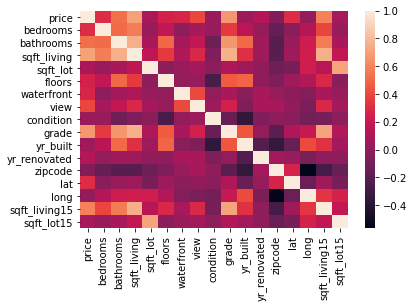

In [30]:
sns.heatmap(df.corr());

In [31]:

df.corr()['sqft_lot']['sqft_lot15']

0.7182040308060962

In [32]:
df.corr()['price']['sqft_living']

0.7019173021377597

In [33]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition        float64
grade              int64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
has_basement      object
dtype: object

In [34]:
# drop 1 lot
# drop 1 living
# split between model and target

In [35]:
df1 = df.drop(['date', 'grade', 'sqft_living15', 'sqft_lot15',  ], axis=1)

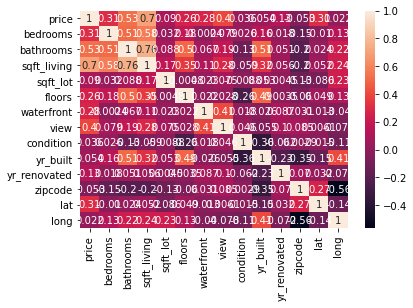

In [36]:
sns.heatmap(df1.corr(), annot=True);

In [37]:
def get_redundant_pairs(df1):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df1.columns
    for i in range(0, df1.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df1, n=5):
    au_corr = df1.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df1)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(df1, 15))

KeyError: ('has_basement', 'long')

In [ ]:
df1

In [ ]:
price        sqft_living      0.701917
price        sqft_living15    0.585241

price	     sqft_lot         0.089876
price	     sqft_lot15	      0.082845 

### df['sqft_lot'] < df['sqft_lot15']

In [ ]:
print(df1.corr()['sqft_lot'].sum(), df1.corr()['sqft_lot15'].sum())

In [ ]:
# Sqft_lot has a lower correlation with other variables and a better one with price - a no brainer

In [ ]:
df1 = df.drop(['sqft_lot15'])

### df['sqft_living'] > df['sqft_living15']

In [ ]:
print(df.corr()['sqft_living'].sum(), df.corr()['sqft_living15'].sum())

In [ ]:
# But sqft_living is better correlated with Price by quite a lot, and also we are not sure about what sqft_lot15 means, 
# so from a business understanding standpoint, is better to go with sqft_lot

In [38]:
df1 = df.drop(['sqft_living']

SyntaxError: unexpected EOF while parsing (<ipython-input-38-0760720a87fc>, line 1)

In [39]:
df1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.053953,0.129599,-0.053402,0.306692,0.022036
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.155670,0.018495,-0.154092,-0.009951,0.132054
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.507173,0.051050,-0.204786,0.024280,0.224903
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.318152,0.055660,-0.199802,0.052155,0.241214
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.052946,0.004513,-0.129586,-0.085514,0.230227
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.489193,0.003535,-0.059541,0.049239,0.125943
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,-0.026079,0.087244,0.031057,-0.012772,-0.039864
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,-0.054564,0.100964,0.085277,0.006141,-0.077894
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.361592,-0.061858,0.002888,-0.015102,-0.105877
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.026079,-0.054564,-0.361592,1.000000,-0.225209,-0.347210,-0.148370,0.409993


In [152]:
price_kctest = "price~bedrooms+sqft_living"
pricekc_modtest = ols(formula=price_kctest, data=df1).fit()
pricekc_mod_summtest = pricekc_modtest.summary()

In [151]:
price_mod_summ

NameError: name 'price_mod_summ' is not defined

In [42]:
pricekc_mod_summ

NameError: name 'pricekc_mod_summ' is not defined

In [43]:
pricekc_mod_summ1

NameError: name 'pricekc_mod_summ1' is not defined

In [44]:
pricekc_mod_summ2

NameError: name 'pricekc_mod_summ2' is not defined

In [45]:
# transformar zipcode e has_basement em categorical values

In [46]:
df1['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [47]:
df1['has_basement'].value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

In [48]:
columnsdf1 = list(df1.columns)

In [49]:
pd.plotting.scatter_matrix(df1[columnsdf], figsize=(10,12));

NameError: name 'columnsdf' is not defined

In [50]:
df1[columnsdf].corr()

NameError: name 'columnsdf' is not defined

In [51]:
df1['has_basement'] = df1['has_basement'].astype(str)

In [52]:
df1.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,1970.999676,83.636778,98077.951845,47.560093,-122.213982
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,29.375234,399.946414,53.513072,0.138552,0.140724
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [53]:
df1.dtypes

price           float64
bedrooms          int64
bathrooms       float64
sqft_living       int64
sqft_lot          int64
floors          float64
waterfront      float64
view            float64
condition       float64
yr_built          int64
yr_renovated    float64
zipcode           int64
lat             float64
long            float64
has_basement     object
dtype: object

In [54]:
df1['price'][0:10]

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: price, dtype: float64

In [55]:
b = df1.sort_values(['price'], ascending=False)

In [56]:
b.shape

(21597, 15)

In [57]:
b[800:850]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
738,1300000.0,3,3.25,3400,5979,2.0,0.0,0.0,4.0,1937,0.0,98105,47.6585,-122.273,1
8330,1300000.0,5,1.00,1670,6400,1.5,NaN,0.0,3.0,1919,0.0,98119,47.6542,-122.373,0
11081,1300000.0,5,3.50,3700,8504,2.0,NaN,0.0,3.0,1950,2014.0,98105,47.6690,-122.275,1
20236,1300000.0,3,2.50,3350,7752,1.0,0.0,0.0,3.0,2009,0.0,98008,47.6263,-122.099,1
16170,1300000.0,5,1.75,2130,19180,1.0,0.0,0.0,3.0,1968,NaN,98004,47.6380,-122.213,1
427,1300000.0,3,2.00,2350,15021,1.0,0.0,0.0,4.0,1976,NaN,98004,47.6408,-122.219,1
8411,1300000.0,5,3.75,3490,15246,1.0,0.0,1.0,4.0,1968,0.0,98040,47.5479,-122.212,1
12597,1300000.0,5,3.75,4450,7680,2.0,0.0,0.0,3.0,2010,0.0,98199,47.6418,-122.392,1
14668,1300000.0,2,2.50,2910,19449,2.0,1.0,4.0,5.0,1985,0.0,98177,47.7729,-122.393,1
14202,1290000.0,5,3.50,2980,5100,2.0,0.0,0.0,3.0,2015,0.0,98115,47.6782,-122.299,1


In [58]:
21597 * 0.05


1079.8500000000001

In [59]:
c = b[1079:]

In [60]:
c

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
15822,1160000.0,4,2.50,3860,10361,2.0,0.0,2.0,4.0,1985,NaN,98006,47.5517,-122.147,1
13709,1160000.0,5,1.75,2870,9680,1.0,0.0,4.0,5.0,1966,0.0,98008,47.6122,-122.111,1
18953,1160000.0,4,2.50,2960,26742,1.0,0.0,3.0,3.0,1949,1996.0,98115,47.6846,-122.268,1
6976,1160000.0,3,1.75,1640,10464,1.0,NaN,2.0,4.0,1968,0.0,98004,47.5873,-122.205,0
4622,1160000.0,4,2.50,4240,43995,2.0,0.0,0.0,3.0,1989,0.0,98075,47.6008,-122.044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2.0,1951,0.0,98168,47.4799,-122.296,0
8267,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3.0,1954,0.0,98146,47.4987,-122.341,0
16184,81000.0,2,1.00,730,9975,1.0,NaN,0.0,1.0,1943,0.0,98168,47.4808,-122.315,0
465,80000.0,1,0.75,430,5050,1.0,NaN,0.0,2.0,1912,0.0,98014,47.6499,-121.909,0


In [61]:
price_kc3 = "price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+yr_built+yr_renovated+has_basement+zipcode+lat+long"
pricekc_mod3 = ols(formula=price_kc3, data=c).fit()
pricekc_mod_summ3 = pricekc_mod3.summary()

In [62]:
pricekc_mod_summ3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1834.
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:52:51   Log-Likelihood:            -1.9734e+05
No. Observations:               14973   AIC:                         3.947e+05
Df Residuals:                   14958   BIC:                         3.948e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.586e+05   2.22e+06     -0.297      0.766      -5e+06    3.69e+06
has_basement[T.1] -5731.4597   2566.939     -2.233      0.026   -1.08e+04    -699.945
bedrooms          -2.023e+04   1446.469    -13.982      0.000   -2.31e+04   -1.74e+04
bathrooms          2.695e+04   2584.182     10.427      0.000    2.19e+04     3.2e+04
sqft_living         161.1493      2.200     73.257      0.000     156.837     165.461
sqft_lot              0.1600      0.027      5.956      0.000       0.107       0.213
floors             4.669e+04   2666.568     17.508      0.000    4.15e+04    5.19e+04
waterfront         9.864e+04   2.01e+04      4.903      0.000    5.92e+04    1.38e+05
view               4.415e+04   1779.377     24.813      0.000    4.07e+04    4.76e+04
condition          2.431e+04   1796.647     13.529      0.000    2.08e+04    2.78e+04
yr_built          -1117.5886     55.350    -20.191      0.000   -1226.080   -1009.097
yr_renovated         16.8456      2.945      5.720      0.000      11.073      22.618
zipcode            -350.5233     25.183    -13.919      0.000    -399.885    -301.162
lat                6.275e+05   7943.646     79.000      0.000    6.12e+05    6.43e+05
long              -6.061e+04   9798.198     -6.185      0.000   -7.98e+04   -4.14e+04
==============================================================================
Omnibus:                     1004.413   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1753.965
Skew:                           0.509   Prob(JB):                         0.00
Kurtosis:                       4.332   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
pricekc_mod_summtest

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:52:46   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.091e+04   6638.826     12.187      0.000    6.79e+04    9.39e+04
bedrooms    -5.783e+04   2322.987    -24.896      0.000   -6.24e+04   -5.33e+04
sqft_living   314.6011      2.344    134.232      0.000     310.007     319.195
==============================================================================
Omnibus:                    14391.571   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488612.629
Skew:                           2.728   Prob(JB):                         0.00
Kurtosis:                      25.654   Cond. No.                     8.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
d = b

In [65]:
price_kc4 = "price~bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+yr_built+has_basement+zipcode+lat+long"
pricekc_mod4 = ols(formula=price_kc4, data=d).fit()
pricekc_mod_summ4 = pricekc_mod4.summary()

In [66]:
pricekc_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     3166.
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:52:52   Log-Likelihood:            -2.6247e+05
No. Observations:               19164   AIC:                         5.250e+05
Df Residuals:                   19151   BIC:                         5.251e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.822e+06   3.26e+06      2.399      0.016    1.43e+06    1.42e+07
has_basement[T.1] -3.486e+04   3761.263     -9.268      0.000   -4.22e+04   -2.75e+04
bedrooms          -5.048e+04   2113.697    -23.884      0.000   -5.46e+04   -4.63e+04
bathrooms          5.359e+04   3689.417     14.525      0.000    4.64e+04    6.08e+04
sqft_living         271.9847      2.886     94.242      0.000     266.328     277.642
floors             3.279e+04   3867.281      8.478      0.000    2.52e+04    4.04e+04
waterfront          5.81e+05   1.96e+04     29.590      0.000    5.43e+05     6.2e+05
view               6.377e+04   2371.882     26.887      0.000    5.91e+04    6.84e+04
condition          2.318e+04   2617.835      8.854      0.000     1.8e+04    2.83e+04
yr_built          -1988.4704     75.882    -26.205      0.000   -2137.205   -1839.735
zipcode            -720.7663     37.208    -19.371      0.000    -793.696    -647.836
lat                6.985e+05   1.19e+04     58.626      0.000    6.75e+05    7.22e+05
long              -2.738e+05   1.43e+04    -19.097      0.000   -3.02e+05   -2.46e+05
==============================================================================
Omnibus:                    13723.346   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           781033.547
Skew:                           2.859   Prob(JB):                         0.00
Kurtosis:                      33.748   Cond. No.                     2.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# We checked for outliers by our distribuition, verified for the 75%, 95% and tried the FSM without them and realized that our 
# R-Squared was actually dropping it, meaning that they are significant for our model.

In [68]:
b1 = df1.sort_values(['price'], ascending=True)

In [69]:
b1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
15279,78000.0,2,1.00,780,16344,1.0,0.0,0.0,1.0,1942,NaN,98168,47.4739,-122.280,0
465,80000.0,1,0.75,430,5050,1.0,NaN,0.0,2.0,1912,0.0,98014,47.6499,-121.909,0
16184,81000.0,2,1.00,730,9975,1.0,NaN,0.0,1.0,1943,0.0,98168,47.4808,-122.315,0
8267,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3.0,1954,0.0,98146,47.4987,-122.341,0
2139,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2.0,1951,0.0,98168,47.4799,-122.296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3.0,2009,0.0,98004,47.6232,-122.220,1
4407,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3.0,2001,NaN,98039,47.6289,-122.233,1
9245,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3.0,2001,0.0,98039,47.6305,-122.240,1
3910,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3.0,1940,2001.0,98004,47.6500,-122.214,1


In [70]:
e = b1[1:]

In [71]:
price_kc5 = "price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+yr_built+yr_renovated+has_basement+zipcode+lat+long"
pricekc_mod5 = ols(formula=price_kc5, data=d).fit()
pricekc_mod_summ5 = pricekc_mod5.summary()

In [72]:
pricekc_mod_summ5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2264.
Date:                Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:52:53   Log-Likelihood:            -2.1586e+05
No. Observations:               15762   AIC:                         4.317e+05
Df Residuals:                   15747   BIC:                         4.319e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           5.52e+06   3.61e+06      1.528      0.127   -1.56e+06    1.26e+07
has_basement[T.1] -3.867e+04   4148.396     -9.322      0.000   -4.68e+04   -3.05e+04
bedrooms          -5.089e+04   2310.937    -22.020      0.000   -5.54e+04   -4.64e+04
bathrooms          5.471e+04   4097.881     13.352      0.000    4.67e+04    6.27e+04
sqft_living         274.5982      3.218     85.334      0.000     268.291     280.906
sqft_lot             -0.0648      0.043     -1.511      0.131      -0.149       0.019
floors             2.829e+04   4275.579      6.617      0.000    1.99e+04    3.67e+04
waterfront         5.758e+05   2.16e+04     26.621      0.000    5.33e+05    6.18e+05
view               6.437e+04   2622.845     24.541      0.000    5.92e+04    6.95e+04
condition          2.457e+04   2923.468      8.404      0.000    1.88e+04    3.03e+04
yr_built          -1930.9910     88.269    -21.876      0.000   -2104.008   -1757.974
yr_renovated         21.5838      4.595      4.698      0.000      12.578      30.590
zipcode            -690.8458     40.960    -16.866      0.000    -771.132    -610.559
lat                6.944e+05   1.32e+04     52.762      0.000    6.69e+05     7.2e+05
long              -2.693e+05    1.6e+04    -16.790      0.000   -3.01e+05   -2.38e+05
==============================================================================
Omnibus:                    11504.666   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           702110.838
Skew:                           2.921   Prob(JB):                         0.00
Kurtosis:                      35.170   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
# We checked for outliers by our distribuition in the other side, veryfing if cheaper houses
# would interfer a lot and tried FSM without them and realized that our 
# R-Squared was actually dropping it, meaning that they are significant for our model.

# Linear Regression bobagem


In [74]:
y = df1['price']
predictors = df1.drop('price', axis=1)
linreg = LinearRegression()
linreg.fit(predictors, y)
linreg.coef_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [75]:
linreg.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [79]:
bathrooms    sqft_living    0.755758
price        sqft_living    0.701917
bedrooms     sqft_living    0.578212
zipcode      long           0.564259
price        bathrooms      0.525906
bedrooms     bathrooms      0.514508
bathrooms    yr_built       0.507173

SyntaxError: invalid syntax (<ipython-input-79-70ac05c060f2>, line 1)

In [80]:
df1['has_basement'] = df1['has_basement'].astype(str)

In [81]:
df1.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3.0,1955,0.0,98178,47.5112,-122.257,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,1951,1991.0,98125,47.7210,-122.319,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3.0,1933,NaN,98028,47.7379,-122.233,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5.0,1965,0.0,98136,47.5208,-122.393,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3.0,1987,0.0,98074,47.6168,-122.045,0


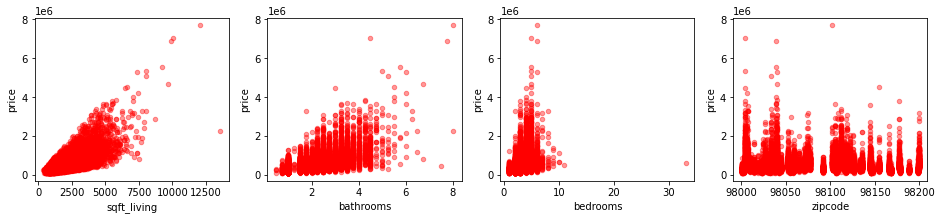

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'bathrooms', 'bedrooms', 'zipcode'], axes):
    df1.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

In [83]:
# REMOVER YEAR_RENOVATED NAO ADICIONA NADA

In [84]:
# REMOVER SQF_LOT, NAO ADICIONA NADA

<ipython-input-85-7e9de8babc3d>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df1.hist(ax = ax)


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

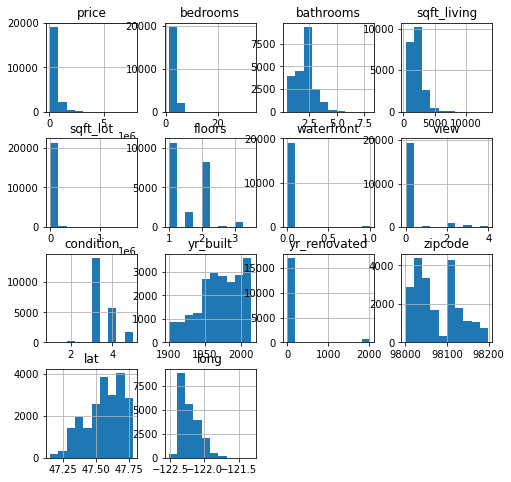

In [85]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df1.hist(ax = ax)

In [86]:
df1['yr_renovated'].nunique()
# 0.117855 corr w Price

70

In [87]:
df1['sqft_lot'].nunique()
# 0.089876 corr w Price

9776

In [88]:
df1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.053953,0.129599,-0.053402,0.306692,0.022036
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.155670,0.018495,-0.154092,-0.009951,0.132054
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.507173,0.051050,-0.204786,0.024280,0.224903
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.318152,0.055660,-0.199802,0.052155,0.241214
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.052946,0.004513,-0.129586,-0.085514,0.230227
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.489193,0.003535,-0.059541,0.049239,0.125943
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,-0.026079,0.087244,0.031057,-0.012772,-0.039864
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,-0.054564,0.100964,0.085277,0.006141,-0.077894
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.361592,-0.061858,0.002888,-0.015102,-0.105877
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.026079,-0.054564,-0.361592,1.000000,-0.225209,-0.347210,-0.148370,0.409993


# Train Test Split

In [89]:
df1.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3.0,1955,0.0,98178,47.5112,-122.257,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,1951,1991.0,98125,47.7210,-122.319,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3.0,1933,NaN,98028,47.7379,-122.233,0


In [90]:
y = df1.price
X = df1.drop(columns=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                   random_state=22)

In [91]:
lr = LinearRegression()

In [92]:
lr.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [93]:
lr.score(X_train, y_train)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [94]:
lr.coef_


AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [95]:
df1['has_basement'] = df1['has_basement'].astype(float)

In [96]:
def get_redundant_pairs(df1):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df1.columns
    for i in range(0, df1.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df1, n=5):
    au_corr = df1.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df1)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(df1, 15))

bathrooms    sqft_living    0.755758
price        sqft_living    0.701917
bedrooms     sqft_living    0.578212
zipcode      long           0.564259
price        bathrooms      0.525906
bedrooms     bathrooms      0.514508
bathrooms    yr_built       0.507173
             floors         0.502582
floors       yr_built       0.489193
yr_built     long           0.409993
waterfront   view           0.406654
price        view           0.395734
condition    yr_built       0.361592
sqft_living  floors         0.353953
yr_built     zipcode        0.347210
dtype: float64


In [97]:
df1.nunique()

price           3622
bedrooms          12
bathrooms         29
sqft_living     1034
sqft_lot        9776
floors             6
waterfront         2
view               5
condition          5
yr_built         116
yr_renovated      70
zipcode           70
lat             5033
long             751
has_basement       2
dtype: int64

<AxesSubplot:>

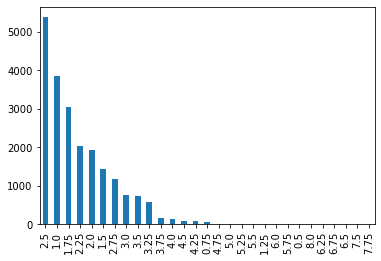

In [98]:
df1['bathrooms'].value_counts().plot(kind='bar')

<AxesSubplot:>

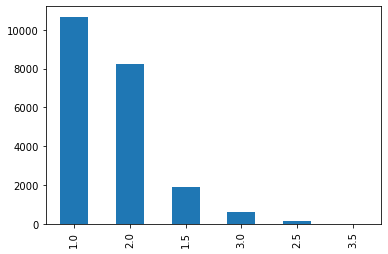

In [99]:
df1['floors'].value_counts().plot(kind='bar')

C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

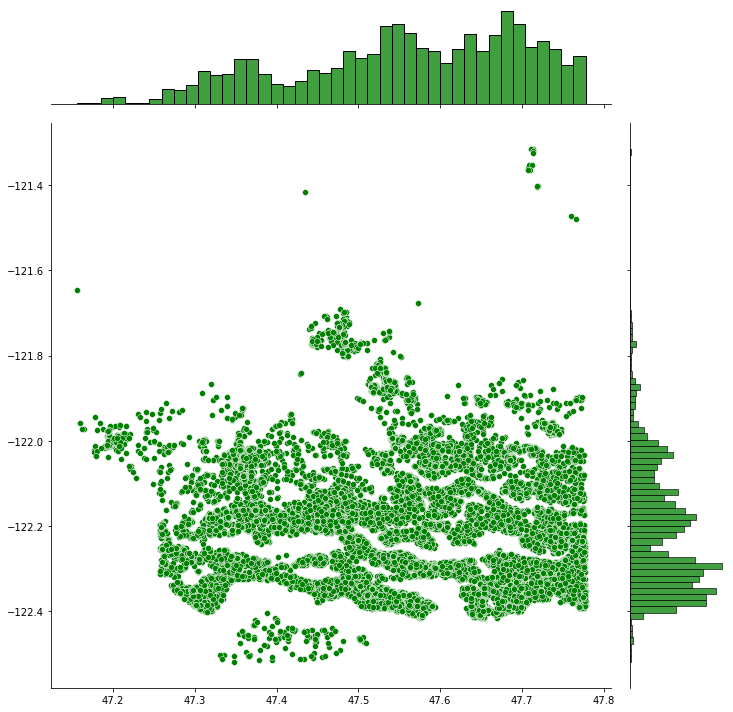

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [100]:
plt.figure(figsize=(12, 12))
sns.jointplot(x=df1.lat.values, y=df1.long.values, size=10, color='g')
plt.ylabel('Long', fontsize=12)
plt.xlabel('Lat', fontsize=12)
plt.show()
sns.despine

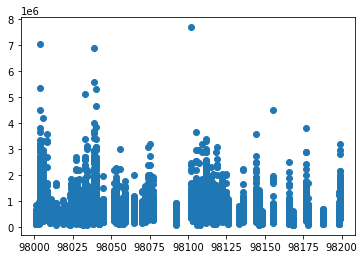

In [101]:
plt.scatter(df1.zipcode,df1.price)

In [102]:
df2 = df1.sort_values(['price'], ascending=False)[3:]

Text(0.5, 1.0, 'Prices per ZipCode (without the top 3)')

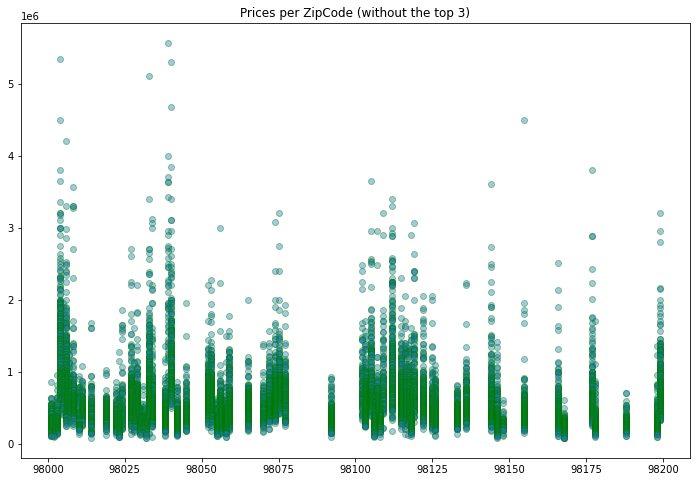

In [103]:
plt.figure(figsize = (12,8))
plt.scatter(df2.zipcode,df2.price, alpha=0.4, edgecolors='g')
plt.title("Prices per ZipCode (without the top 3)")

In [104]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3.0,7,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3.0,6,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5.0,7,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3.0,8,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3.0,8,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3.0,8,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3.0,7,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3.0,8,2004,0.0,98027,47.5345,-122.069,1410,1287,0


In [105]:
dftest = df

In [106]:
type(dftest['date'][0])

str

In [107]:
testlista = []
for x in dftest['date']:
    testlista.append(x[-4:])


In [108]:
testlista

['2014',
 '2014',
 '2015',
 '2014',
 '2015',
 '2014',
 '2014',
 '2015',
 '2015',
 '2015',
 '2015',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2015',
 '2015',
 '2014',
 '2015',
 '2014',
 '2015',
 '2015',
 '2014',
 '2014',
 '2015',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2015',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 

In [109]:
dftest['year_sold'] = testlista

In [110]:
dftest['year_sold'].nunique()

2

In [111]:
dftest['year_sold'] = np.where(dftest['year_sold']== '2014', 0, 1)

In [112]:
dftest['year_sold'].nunique()

2

In [113]:
dftest['year_sold'].value_counts()

0    14622
1     6975
Name: year_sold, dtype: int64

In [114]:
dftest.drop(columns=['date'], inplace=True)

In [115]:
dftest

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,year_sold
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3.0,7,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3.0,6,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5.0,7,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3.0,8,1987,0.0,98074,47.6168,-122.045,1800,7503,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3.0,8,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3.0,8,2014,0.0,98146,47.5107,-122.362,1830,7200,0,1
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3.0,7,2009,0.0,98144,47.5944,-122.299,1020,2007,0,0
21595,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3.0,8,2004,0.0,98027,47.5345,-122.069,1410,1287,0,1


In [116]:
y = dftest.price
X = dftest.drop(columns=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                   random_state=30)

In [117]:
lr.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [118]:

lr.score(X_train, y_train)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [119]:
lr.score(X_test, y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [120]:
lr.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [121]:
egbr = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 25,
                                         learning_rate = 0.1, loss = 'ls')

In [122]:
egbr.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [123]:
egbr.score(X_test, y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [124]:
dftest

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,year_sold
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3.0,7,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3.0,6,1933,NaN,98028,47.7379,-122.233,2720,8062,0,1
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5.0,7,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3.0,8,1987,0.0,98074,47.6168,-122.045,1800,7503,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3.0,8,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3.0,8,2014,0.0,98146,47.5107,-122.362,1830,7200,0,1
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3.0,7,2009,0.0,98144,47.5944,-122.299,1020,2007,0,0
21595,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3.0,8,2004,0.0,98027,47.5345,-122.069,1410,1287,0,1


In [125]:
X = dftest.drop('price', axis=1)
y = dftest.price

In [126]:
kf = KFold(n_splits=5)

train_r2 = []
test_r2 = []
for train_ind, test_ind in kf.split(X, y):
    
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_test, y_test = X.iloc[test_ind], y.iloc[test_ind]
    
    lr.fit(X_train, y_train)
    train_r2.append(lr.score(X_train, y_train))
    test_r2.append(lr.score(X_test, y_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [127]:
np.mean(train_r2)

C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [128]:
np.mean(test_r2)

nan

In [129]:
poly_2 = PolynomialFeatures(2)

df_poly = pd.DataFrame(
            poly_2.fit_transform(df.drop('price', axis=1))
                      )

X = df_poly
y = df.price

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [130]:
np.mean(train_r2)

C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Chris\anaconda3\envs\learn-env\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [131]:
np.mean(test_r2)

nan

In [132]:
dftest.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,year_sold
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3.0,7,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0


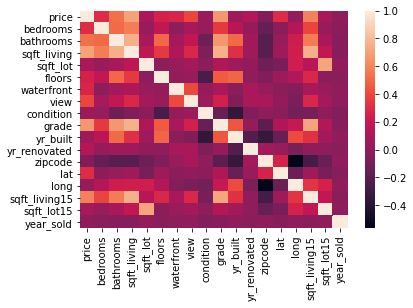

In [133]:
sns.heatmap(dftest.corr());